In [1]:
!pip install fredapi

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 200) 
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'd2a57050a8daf63c0621b00a1659083f'

In [7]:
# 1. Create the Fred Object

In [8]:
fred = Fred(api_key=fred_key)

In [9]:
# 2. Search for economic data

In [10]:
sp_search = fred.search('S&P', order_by='popularity')

In [11]:
sp_search.head(10)

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-09-06   2024-09-06   
CSUSHPINSA          CSUSHPINSA     2024-09-06   2024-09-06   
SP500                    SP500     2024-09-06   2024-09-06   
MEHOINUSA672N    MEHOINUSA672N     2024-09-06   2024-09-06   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-09-06   2024-09-06   
BAMLC0A0CM          BAMLC0A0CM     2024-09-06   2024-09-06   
CSUSHPISA            CSUSHPISA     2024-09-06   2024-09-06   
DJIA                      DJIA     2024-09-06   2024-09-06   
MEHOINUSA646N    MEHOINUSA646N     2024-09-06   2024-09-06   
BAMLHE00EHYIEY  BAMLHE00EHYIEY     2024-09-06   2024-09-06   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   
CSUSHPISA       S&P CoreLogic Case-Shiller U.S. National Home ...   
DJIA                                 Dow Jones Industrial Average   
MEHOINUSA646N        Median Household Income in the United States   
BAMLHE00EHYIEY     ICE BofA Euro High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-09-05  Daily, Close   
CSUSHPINSA            1987-01-01      2024-06-01       Monthly   
SP500                 2014-09-08      2024-09-05  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-09-05  Daily, Close   
BAMLC0A0CM            1996-12-31      2024-09-04  Daily, Close   
CSUSHPISA             1987-01-01      2024-06-01       Monthly   
DJIA                  2014-09-08      2024-09-05  Daily, Close   
MEHOINUSA646N         1984-01-01      2022-01-01        Annual   
BAMLHE00EHYIEY        1997-12-31      2024-09-05  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   
BAMLC0A0CM                   D                         Percent   
CSUSHPISA                    M              Index Jan 2000=100   
DJIA                         D                           Index   
MEHOINUSA646N                A                 Current Dollars   
BAMLHE00EHYIEY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
BAMLC0A0CM                             %  Not Seasonally Adjusted   
CSUSHPISA             Index Jan 2000=100      Seasonally Adjusted   
DJIA                               Index  Not Seasonally Adjusted   
MEHOINUSA646N                  Current $  Not Seasonally Adjusted   
BAMLHE00EHYIEY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_shor

In [12]:
# 3. Pull raw Data & Plot

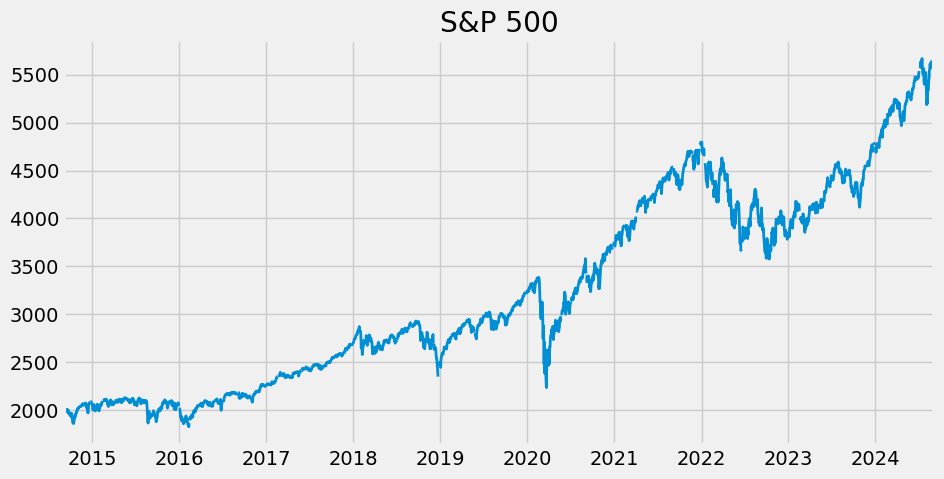

In [13]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [14]:
# 4. Pull and Joiun Multiple Data Series

In [15]:
uemp_results = fred.search('unemployment')

In [16]:
uemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-09-06   2024-09-06   
UNRATENSA                          UNRATENSA     2024-09-06   2024-09-06   
UNEMPLOY                            UNEMPLOY     2024-09-06   2024-09-06   
NROU                                    NROU     2024-09-06   2024-09-06   
CCSA                                    CCSA     2024-09-06   2024-09-06   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-09-06   2024-09-06   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-09-06   2024-09-06   
LNS14000315                      LNS14000315     2024-09-06   2024-09-06   
LNU04032222                      LNU04032222     2024-09-06   2024-09-06   
LNU04032223                      LNU04032223     2024-09-06   2024-09-06   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-08-01   
UNRATENSA                    1948-01-01      2024-08-01   
UNEMPLOY                     1948-01-01      2024-08-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-08-24   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-08-01   
LNU04032222                  2000-01-01      2024-08-01   
LNU04032223                  2000-01-01      2024-08-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [17]:
unrate = fred.get_series('UNRATE')

In [18]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
Length: 920, dtype: float64

<Axes: title={'center': 'Unemployment'}>

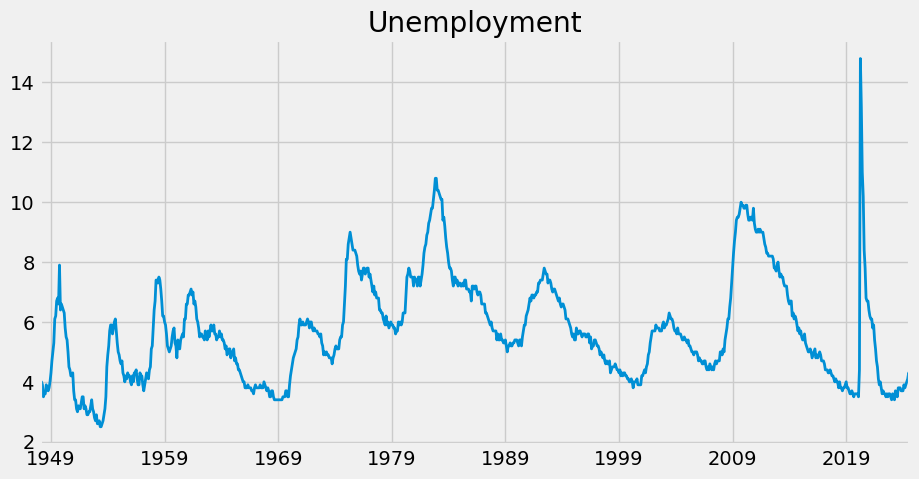

In [19]:
unrate.plot(figsize=(10, 5), title='Unemployment', lw=2)

In [20]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [21]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-09-06   2024-09-06   
LNS14000006            LNS14000006     2024-09-06   2024-09-06   
CAUR                          CAUR     2024-09-06   2024-09-06   
TXUR                          TXUR     2024-09-06   2024-09-06   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-09-06   2024-09-06   
...                            ...            ...          ...   
LNS14000026            LNS14000026     2024-09-06   2024-09-06   
LNS14000048            LNS14000048     2024-09-06   2024-09-06   
LNS14000089            LNS14000089     2024-09-06   2024-09-06   
M08311USM156SNBR  M08311USM156SNBR     2024-09-06   2024-09-06   
LNS14000150            LNS14000150     2024-09-06   2024-09-06   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000026               Unemployment Rate - 20 Yrs. & over, Women   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-08-01   Monthly               M   
LNS14000006             1972-01-01      2024-08-01   Monthly               M   
CAUR                    1976-01-01      2024-07-01   Monthly               M   
TXUR                    1976-01-01      2024-07-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000026             1948-01-01      2024-08-01   Monthly               M   
LNS14000048             1948-01-01      2024-08-01   Monthly               M   
LNS14000089             1948-01-01      2024-08-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-08-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000026       Percent           %  Seasonally Adjusted   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-09-06 07:46:02-05:00   
LNS14000006                             SA  2024-09-06 07:46:16-05:00   
CAUR                                    SA  2024-08-20 12:36:01-05:00   
TXUR                                

In [22]:
unemp_df['index_col'] = unemp_df.index

In [23]:
filtered_unemp_df = unemp_df.query('index_col.str.len() == 4').drop(columns=['index_col'])

In [24]:
print(filtered_unemp_df)

             id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2024-09-06   2024-09-06   
TXUR       TXUR     2024-09-06   2024-09-06   
NYUR       NYUR     2024-09-06   2024-09-06   
FLUR       FLUR     2024-09-06   2024-09-06   
PAUR       PAUR     2024-09-06   2024-09-06   
OHUR       OHUR     2024-09-06   2024-09-06   
MIUR       MIUR     2024-09-06   2024-09-06   
ALUR       ALUR     2024-09-06   2024-09-06   
MAUR       MAUR     2024-09-06   2024-09-06   
NCUR       NCUR     2024-09-06   2024-09-06   
ILUR       ILUR     2024-09-06   2024-09-06   
NJUR       NJUR     2024-09-06   2024-09-06   
GAUR       GAUR     2024-09-06   2024-09-06   
COUR       COUR     2024-09-06   2024-09-06   
AZUR       AZUR     2024-09-06   2024-09-06   
WIUR       WIUR     2024-09-06   2024-09-06   
VAUR       VAUR     2024-09-06   2024-09-06   
KYUR       KYUR     2024-09-06   2024-09-06   
SCUR       SCUR     2024-09-06   2024-09-06   
NMUR       NM

In [38]:
all_results = []

for myid in filtered_unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [39]:
all_results[3]

FLUR
1976-01-01   9.7
1976-02-01   9.7
1976-03-01   9.6
1976-04-01   9.5
1976-05-01   9.3
...          ...
2024-03-01   3.2
2024-04-01   3.3
2024-05-01   3.3
2024-06-01   3.3
2024-07-01   3.3

[583 rows x 1 columns]

In [33]:
# Plot States Unemployment Rate

In [55]:
uemp_results.dropna(axis=1)

if 'PRUR' in uemp_results.columns:
    uemp_results.drop(columns=['PRUR'], inplace=True)
    
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [56]:
uemp_states = uemp_results

In [57]:
px.line(uemp_states).update_xaxes(
dtick="M60", #Cada 60 meses (5 años)
tickformat="%Y", #Formato de la etiqueta del eje X ( solo muestra el año)
)


C:\Users\Gonzalo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
# Pull April 2020 Unemployment Rate per State

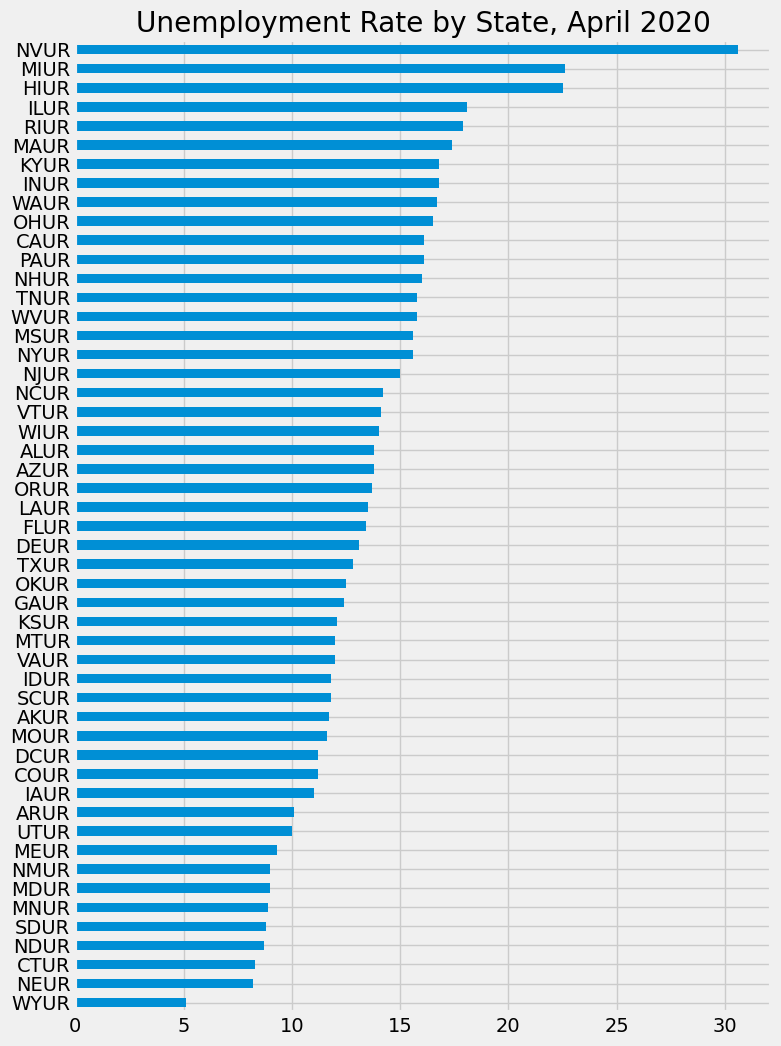

In [44]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T\
.sort_values('2020-04-01')\
.plot(kind='barh', figsize=(8, 12), title='Unemployment Rate by State, April 2020')

ax.legend().remove()
plt.show()

In [ ]:
# Pull Participation Rate

In [45]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-09-06   2024-09-06   
LNS11300060          LNS11300060     2024-09-06   2024-09-06   
LNS11300002          LNS11300002     2024-09-06   2024-09-06   
LNS11300001          LNS11300001     2024-09-06   2024-09-06   
LNS11324230          LNS11324230     2024-09-06   2024-09-06   
LNS11300012          LNS11300012     2024-09-06   2024-09-06   
LNS11300006          LNS11300006     2024-09-06   2024-09-06   
LRAC25MAUSM156S  LRAC25MAUSM156S     2024-09-06   2024-09-06   
LNS11300036          LNS11300036     2024-09-06   2024-09-06   
LRAC25FEUSM156S  LRAC25FEUSM156S     2024-09-06   2024-09-06   
LNS11327662          LNS11327662     2024-09-06   2024-09-06   
LBSSA06                  LBSSA06     2024-09-06   2024-09-06   
LNS11300028          LNS11300028     2024-09-06   2024-09-06   
LNS11300031          LNS11300031     2024-09-06   2024-09-06   
LBSSA01                  LBSSA01     2024-09-06   2024-09-06   
LNS11300003          LNS11300003     2024-09-06   2024-09-06   
LNS11327660          LNS11327660     2024-09-06   2024-09-06   
LBSSA36                  LBSSA36     2024-09-06   2024-09-06   
LNS11300029          LNS11300029     2024-09-06   2024-09-06   
LBSSA26                  LBSSA26     2024-09-06   2024-09-06   
LBSSA28                  LBSSA28     2024-09-06   2024-09-06   
LNS11300009          LNS11300009     2024-09-06   2024-09-06   
LNS11300032          LNS11300032     2024-09-06   2024-09-06   
LBSSA48                  LBSSA48     2024-09-06   2024-09-06   
LBSSA12                  LBSSA12     2024-09-06   2024-09-06   
LBSSA21                  LBSSA21     2024-09-06   2024-09-06   
LBSSA39                  LBSSA39     2024-09-06   2024-09-06   
LBSSA55                  LBSSA55     2024-09-06   2024-09-06   
LBSSA42                  LBSSA42     2024-09-06   2024-09-06   
LBSSA25                  LBSSA25     2024-09-06   2024-09-06   
LBSSA27                  LBSSA27     2024-09-06   2024-09-06   
LBSSA24                  LBSSA24     2024-09-06   2024-09-06   
LBSSA54                  LBSSA54     2024-09-06   2024-09-06   
LBSSA47                  LBSSA47     2024-09-06   2024-09-06   
LNS11327659          LNS11327659     2024-09-06   2024-09-06   
LBSSA23                  LBSSA23     2024-09-06   2024-09-06   
LBSSA17                  LBSSA17     2024-09-06   2024-09-06   
LBSSA37                  LBSSA37     2024-09-06   2024-09-06   
LBSSA13                  LBSSA13     2024-09-06   2024-09-06   
LBSSA22                  LBSSA22     2024-09-06   2024-09-06   
LBSSA45                  LBSSA45     2024-09-06   2024-09-06   
LBSSA08                  LBSSA08     2024-09-06   2024-09-06   
LBSSA49                  LBSSA49     2024-09-06   2024-09-06   
LBSSA51                  LBSSA51     2024-09-06   2024-09-06   
LBSSA18                  LBSSA18     2024-09-06   2024-09-06   
LNS11300026          LNS11300026     2024-09-06   2024-09-06   
LBSSA29                  LBSSA29     2024-09-06   2024-09-06   
LRIN64TTUSM156S  LRIN64TTUSM156S     2024-09-06   2024-09-06   
LBSSA34                  LBSSA34     2024-09-06   2024-09-06   
LRAC64TTUSM156S  LRAC64TTUSM156S     2024-09-06   2024-09-06   
LBSSA19                  LBSSA19     2024-09-06   2024-09-06   
LBSSA02                  LBSSA02     2024-09-06   2024-09-06   
LNS11300025          LNS11300025     2024-09-06   2024-09-06   
LBSSA53                  LBSSA53     2024-09-06   2024-09-06   
LBSSA04                  LBSSA04     2024-09-06   2024-09-06   
LBSSA35                  LBSSA35     2024-09-06   2024-09-06   
LNS11327689          LNS11327689     2024-09-06   2024-09-06   
LBSSA16                  LBSSA16     2024-09-06   2024-09-06   
LBSSA05                  LBSSA05     2024-09-06   2024-09-06   
LBSSA40                  LBSSA40     2024-09-06   2024-09-06   
LBSSA31                  LBSSA31     2024-09-06   2024-09-06  

In [48]:
columns_df = part_df.columns.to_frame(index=False, name='col_name')

In [49]:
filtered_df = part_df[part_df.index.str.startswith('LBSSA')]

In [50]:
filtered_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-09-06   2024-09-06   
LBSSA01    LBSSA01     2024-09-06   2024-09-06   
LBSSA36    LBSSA36     2024-09-06   2024-09-06   
LBSSA26    LBSSA26     2024-09-06   2024-09-06   
LBSSA28    LBSSA28     2024-09-06   2024-09-06   
LBSSA48    LBSSA48     2024-09-06   2024-09-06   
LBSSA12    LBSSA12     2024-09-06   2024-09-06   
LBSSA21    LBSSA21     2024-09-06   2024-09-06   
LBSSA39    LBSSA39     2024-09-06   2024-09-06   
LBSSA55    LBSSA55     2024-09-06   2024-09-06   
LBSSA42    LBSSA42     2024-09-06   2024-09-06   
LBSSA25    LBSSA25     2024-09-06   2024-09-06   
LBSSA27    LBSSA27     2024-09-06   2024-09-06   
LBSSA24    LBSSA24     2024-09-06   2024-09-06   
LBSSA54    LBSSA54     2024-09-06   2024-09-06   
LBSSA47    LBSSA47     2024-09-06   2024-09-06   
LBSSA23    LBSSA23     2024-09-06   2024-09-06   
LBSSA17    LBSSA17     2024-09-06   2024-09-06   
LBSSA37    LBSSA37     2024-09-06   2024-09-06   
LBSSA13    LBSSA13     2024-09-06   2024-09-06   
LBSSA22    LBSSA22     2024-09-06   2024-09-06   
LBSSA45    LBSSA45     2024-09-06   2024-09-06   
LBSSA08    LBSSA08     2024-09-06   2024-09-06   
LBSSA49    LBSSA49     2024-09-06   2024-09-06   
LBSSA51    LBSSA51     2024-09-06   2024-09-06   
LBSSA18    LBSSA18     2024-09-06   2024-09-06   
LBSSA29    LBSSA29     2024-09-06   2024-09-06   
LBSSA34    LBSSA34     2024-09-06   2024-09-06   
LBSSA19    LBSSA19     2024-09-06   2024-09-06   
LBSSA02    LBSSA02     2024-09-06   2024-09-06   
LBSSA53    LBSSA53     2024-09-06   2024-09-06   
LBSSA04    LBSSA04     2024-09-06   2024-09-06   
LBSSA35    LBSSA35     2024-09-06   2024-09-06   
LBSSA16    LBSSA16     2024-09-06   2024-09-06   
LBSSA05    LBSSA05     2024-09-06   2024-09-06   
LBSSA40    LBSSA40     2024-09-06   2024-09-06   
LBSSA31    LBSSA31     2024-09-06   2024-09-06   
LBSSA15    LBSSA15     2024-09-06   2024-09-06   
LBSSA32    LBSSA32     2024-09-06   2024-09-06   
LBSSA30    LBSSA30     2024-09-06   2024-09-06   
LBSSA41    LBSSA41     2024-09-06   2024-09-06   
LBSSA33    LBSSA33     2024-09-06   2024-09-06   
LBSSA50    LBSSA50     2024-09-06   2024-09-06   
LBSSA09    LBSSA09     2024-09-06   2024-09-06   
LBSSA38    LBSSA38     2024-09-06   2024-09-06   
LBSSA46    LBSSA46     2024-09-06   2024-09-06   
LBSSA20    LBSSA20     2024-09-06   2024-09-06   
LBSSA44    LBSSA44     2024-09-06   2024-09-06   
LBSSA11    LBSSA11     2024-09-06   2024-09-06   
LBSSA10    LBSSA10     2024-09-06   2024-09-06   
LBSSA56    LBSSA56     2024-09-06   2024-09-06   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [52]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

all_results = []

for myid in filtered_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)

In [53]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [54]:
part_states

California   Alabama   New York   Michigan   Mississippi   Texas  \
1976-01-01         62.6      57.0       58.0       61.6          58.8    63.8   
1976-02-01         62.4      56.9       58.0       61.5          58.6    63.5   
1976-03-01         62.2      56.8       58.0       61.5          58.5    63.4   
1976-04-01         62.2      56.8       58.0       61.6          58.5    63.5   
1976-05-01         62.3      56.8       58.1       61.7          58.5    63.6   
1976-06-01         62.4      56.9       58.1       61.8          58.5    63.8   
1976-07-01         62.5      56.9       58.2       61.9          58.5    63.9   
1976-08-01         62.6      57.0       58.2       61.9          58.5    63.9   
1976-09-01         62.7      57.1       58.1       61.9          58.5    63.9   
1976-10-01         62.8      57.1       58.1       61.9          58.6    63.8   
1976-11-01         62.9      57.3       58.0       61.9          58.6    63.8   
1976-12-01         63.0      57.4       58.0       62.0          58.6    63.9   
1977-01-01         63.1      57.5       58.1       62.1          58.6    64.0   
1977-02-01         63.2      57.7       58.1       62.2          58.7    64.1   
1977-03-01         63.3      57.9       58.2       62.3          58.7    64.2   
1977-04-01         63.5      58.0       58.3       62.5          58.7    64.3   
1977-05-01         63.6      58.1       58.3       62.6          58.8    64.3   
1977-06-01         63.7      58.2       58.3       62.7          58.8    64.3   
1977-07-01         63.8      58.3       58.4       62.9          58.9    64.4   
1977-08-01         63.9      58.3       58.4       63.0          58.9    64.6   
1977-09-01         64.0      58.4       58.5       63.2          58.9    64.7   
1977-10-01         64.2      58.5       58.6       63.2          58.9    64.9   
1977-11-01         64.3      58.6       58.6       63.3          58.9    65.0   
1977-12-01         64.4      58.7       58.6       63.3          59.0    65.1   
1978-01-01         64.5      58.8       58.7       63.3          58.9    65.1   
1978-02-01         64.7      58.8       58.7       63.3          58.9    65.1   
1978-03-01         64.8      58.9       58.8       63.3          58.8    65.1   
1978-04-01         65.0      58.9       58.9       63.3          58.7    65.2   
1978-05-01         65.1      58.9       59.0       63.4          58.7    65.2   
1978-06-01         65.2      58.9       59.1       63.5          58.7    65.3   
1978-07-01         65.2      59.0       59.3       63.6          58.7    65.4   
1978-08-01         65.3      59.1       59.4       63.7          58.7    65.4   
1978-09-01         65.3      59.2       59.5       63.8          58.6    65.4   
1978-10-01         65.3      59.3       59.6       63.9          58.6    65.5   
1978-11-01         65.4      59.4       59.8       64.1          58.5    65.6   
1978-12-01         65.5      59.4       59.9       64.3          58.5    65.6   
1979-01-01         65.5      59.4       60.0       64.4          58.4    65.7   
1979-02-01         65.5      59.4       60.0       64.4          58.4    65.7   
1979-03-01         65.5      59.5       60.0       64.3          58.3    65.7   
1979-04-01         65.4      59.5       60.0       64.2          58.3    65.6   
1979-05-01         65.4      59.5       60.1       64.2          58.3    65.6   
1979-06-01         65.4      59.5       60.1       64.2          58.3    65.6   
1979-07-01         65.5      59.6       60.2       64.2          58.4    65.7   
1979-08-01         65.6      59.6       60.3       64.3          58.5    65.8   
1979-09-01         65.7      59.6       60.4       64.4          58.6    65.9   
1979-10-01         65.7      59.6       60.5       64.5          58.7    65.9   
1979-11-01         65.8      59.6       60.5       64.5          58.9    66.0   
1979-12-01         65.8      59.5       60.4       64.4          59.0    66.0   
1980-01-01         65.8      59.5       60.3

In [70]:
# Fix DC
uemp_states = uemp_states.rename(columns={' the District of Columbia':'District of Columbia'})

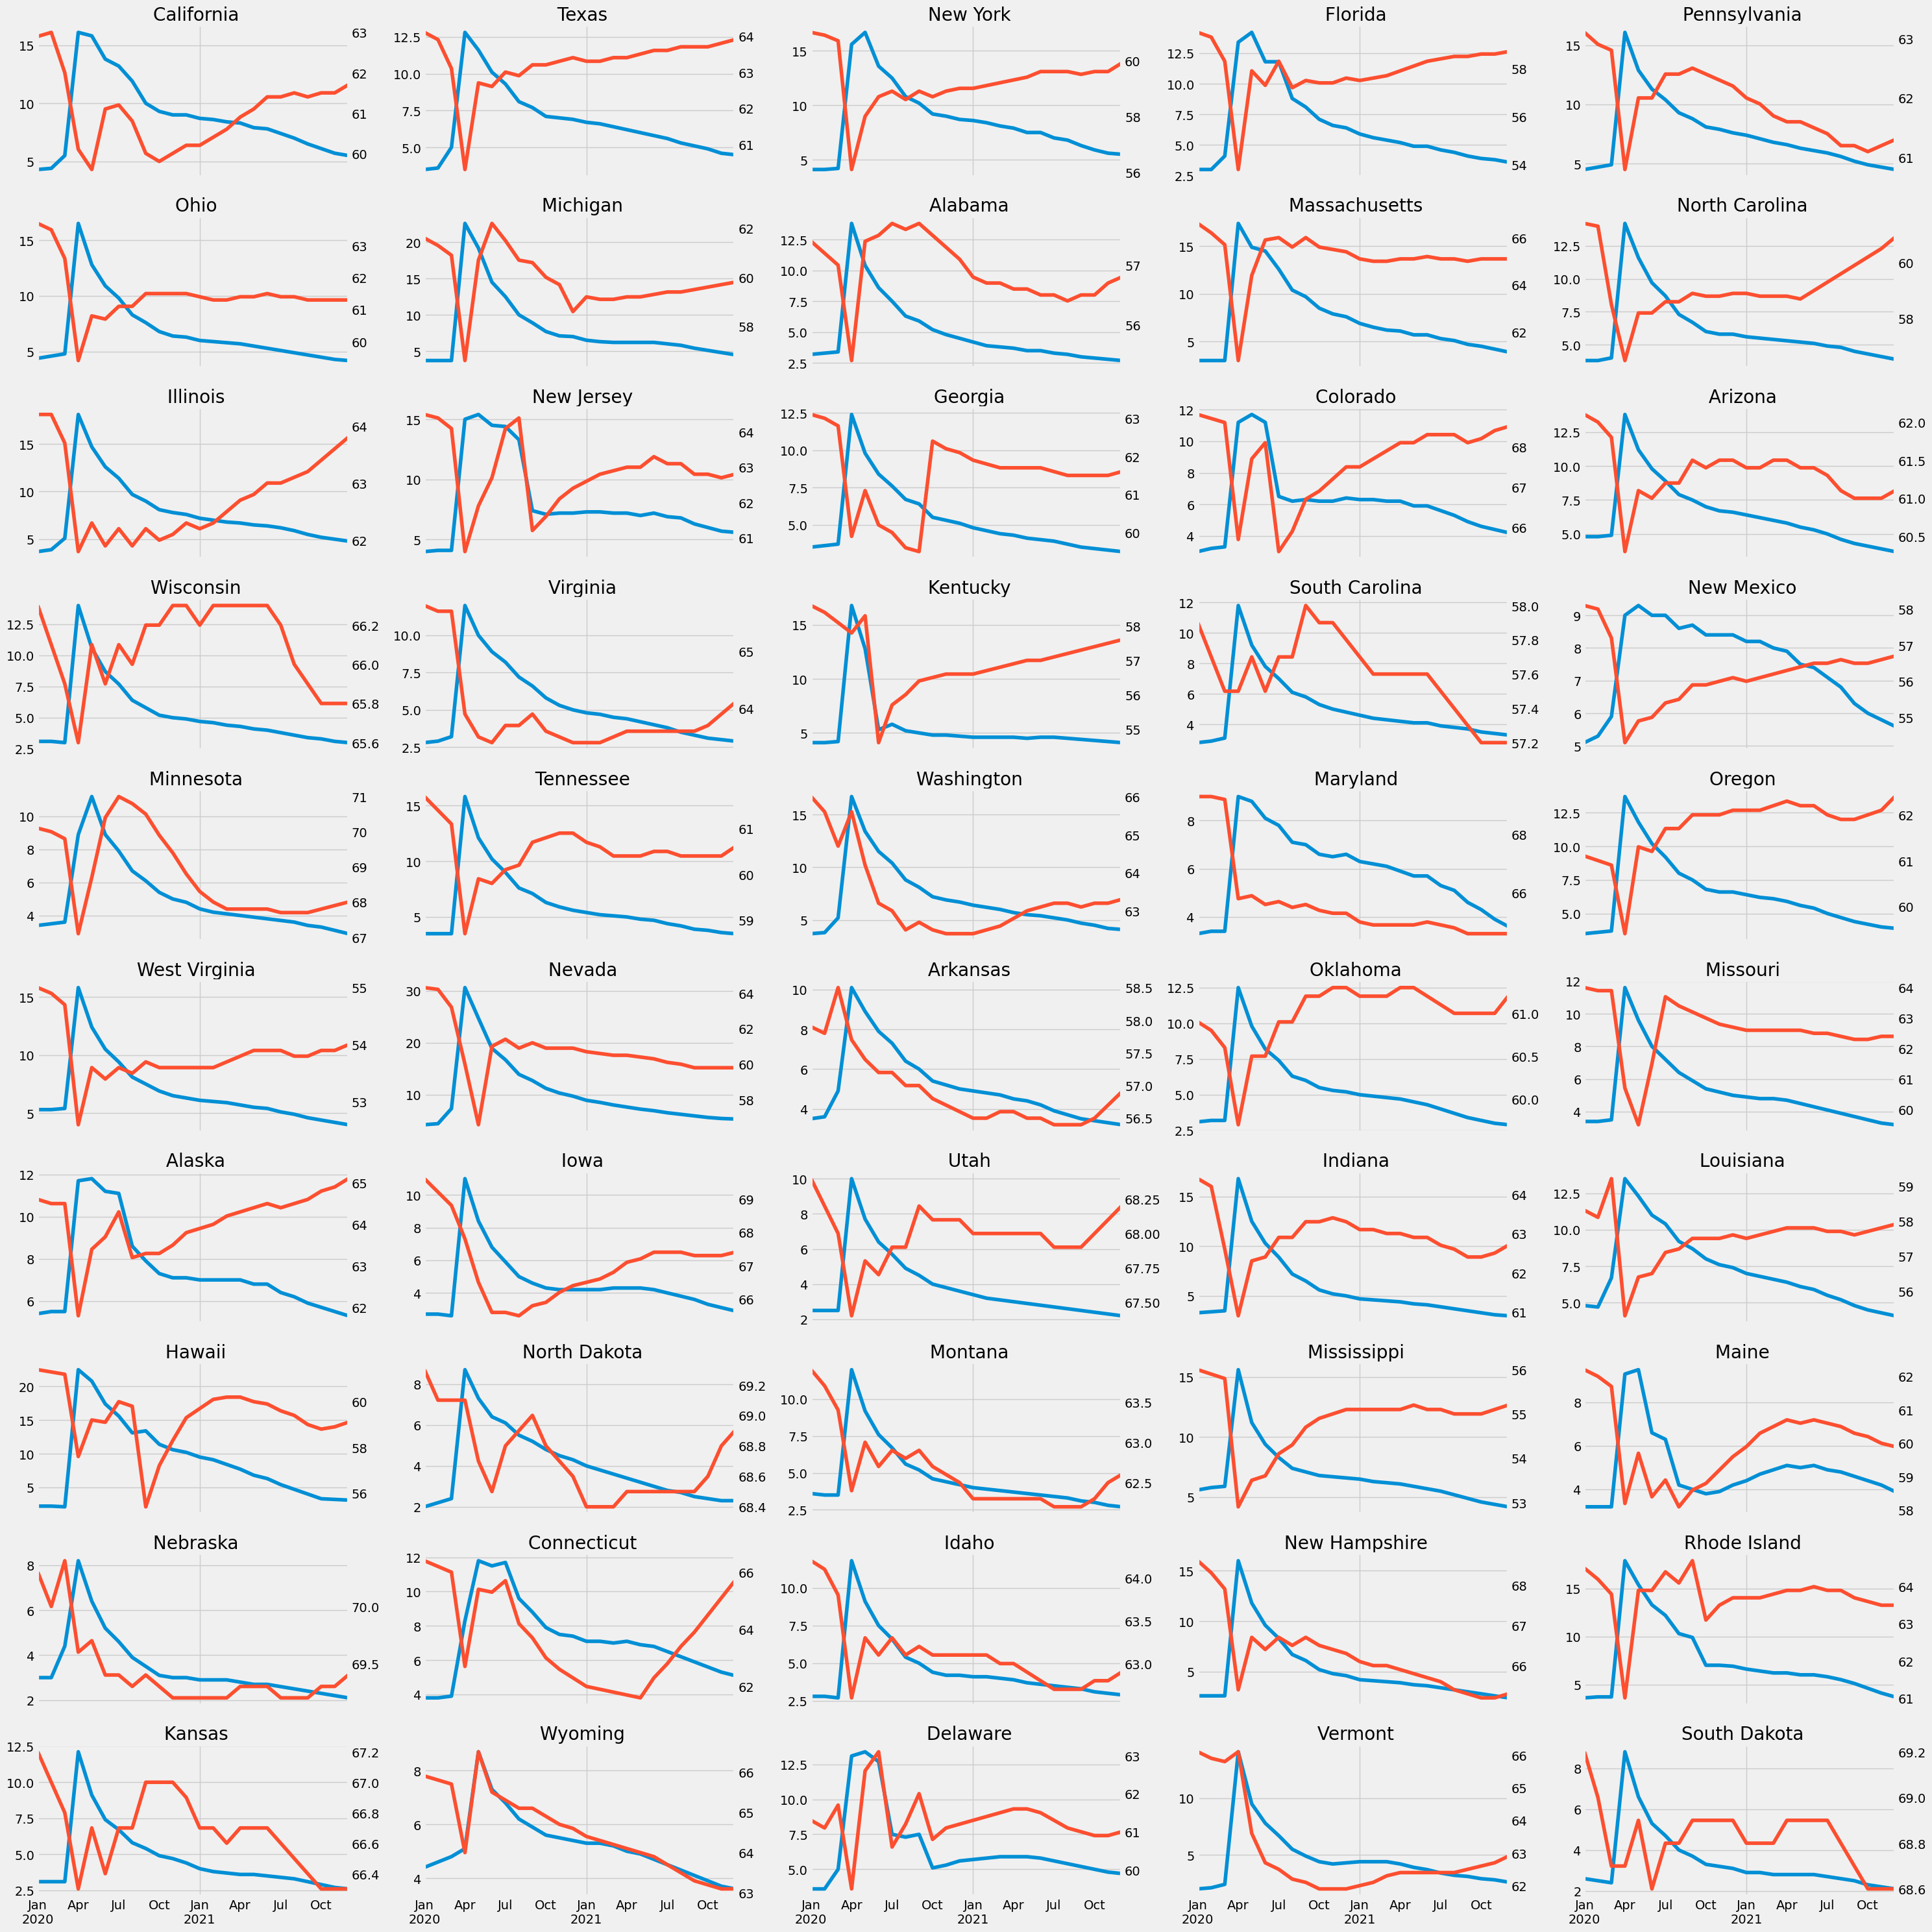

In [72]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state == "District of Columbia":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()